# Titanic Crash Survivors Analysis
# Part 1: Exploratory data analysis
I have tried to present an exploratory data anlalysis using the titanic dataset with 1257 rows and 9 columns. I will start with importing the necessary libaries, exploring the features of the dataset, cleaning the data, and checking the relation among different variables with the survival of the passenger-- for eventually deriving a conclusion out of the analysis with the help of different visualisation methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('titanic.csv',encoding='latin')
data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S
5,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0000,S
6,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S
7,1,0,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
8,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C
9,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C


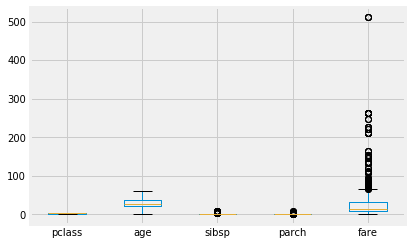

In [4]:
data[['pclass','age','sibsp','parch','fare']].boxplot()

Visualising all the columns on a box plot above makes these points clear:
- Since the column 'fare' has a lot of outliers, I will consider 'pclass' instead of using 'fare' as they both represent the wealth and paying capacity of the passenger - and the correlation table makes it clear that pclass is a better variable that's impacting our response variable.
- Other columns expect for 'age' do not look relevant for our study, so we can simply ignore these boxplots as they're for the categorical variables.

In [5]:
data.corr(method='spearman')

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.322937,-0.380841,-0.064799,-0.027104,-0.701438
survived,-0.322937,1.000000,-0.009863,0.077468,0.150404,0.298513
age,-0.380841,-0.009863,1.000000,-0.117928,-0.194541,0.186815
sibsp,-0.064799,0.077468,-0.117928,1.000000,0.438778,0.446688
parch,-0.027104,0.150404,-0.194541,0.438778,1.000000,0.404194
fare,-0.701438,0.298513,0.186815,0.446688,0.404194,1.000000


From the above spearman correlation table, it's easy to conclude that none of the variables except pclass and fare are strongly impacting the other. All the correlation values are below 45%, except pclass and fare which is -70%

In [6]:
#data.loc[data['sibsp']>5,'sibsp']=5
#data[['sibsp']].boxplot()
#data=data.drop('parch',1)

#I tried to treat the outliers but it made no significant impact on my final model, so I decided to keep them.

Checking the features of our data frame:

In [7]:
# I would like to see if there is any null cells in the entire dataset. If yes, I would like to see the count.

data.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         261
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

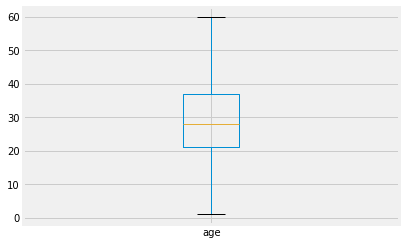

In [8]:
data[['age']].boxplot()

'Age' as an independent variable has no outliers currently but it does have some null values which we will be treating below.

Now, I do not want to ignore the null values in age so I will use the name column and extract the initials of their names (like Mr., Mrs., Dr.) in a new column which I am naming as 'Initial'. I will then replace the null values with a certain age they should be.

In [9]:
data['Initial']=0
for i in data:
    data['Initial']=data.name.str.extract('([A-Za-z]+)\.') #extracting Name initials

checking how this new column looks:

In [10]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,Initial
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,Miss
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,Miss
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S,Mr
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,Mrs
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,Mr


In [11]:
pd.crosstab(data.Initial,data.sex).T

Initial,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,
female,0,1,0,1,1,0,1,0,0,252,2,1,0,191,2,0,0
male,4,0,1,0,7,1,0,2,53,0,0,0,728,0,0,8,1


In [12]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [13]:
data.groupby('Initial')['age'].mean()

Initial
Dona      39.000000
Master     6.333333
Miss      22.002415
Mr        31.053191
Mrs       36.012048
Other     44.923077
Name: age, dtype: float64

In [14]:
data.loc[(data.age.isna()) & (data.Initial=='Mr'),'age']=31
data.loc[(data.age.isna()) & (data.Initial=='Mrs'),'age']=36
data.loc[(data.age.isna()) & (data.Initial=='Master'),'age']=6
data.loc[(data.age.isna()) & (data.Initial=='Miss'), 'age']=22
data.loc[(data.age.isna()) & (data.Initial=='Other'),'age']=data.age.mean()

In [15]:
data.age.isna().any()

False

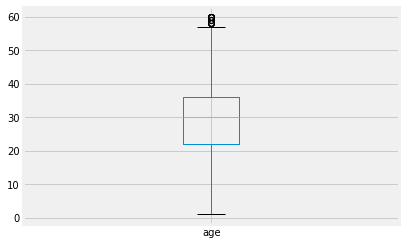

In [16]:
data[['age']].boxplot()

Now if I check the outliers in 'age', I observe there are no serious outliers even now. I am going to ignore the outliers for the new 'age' column.

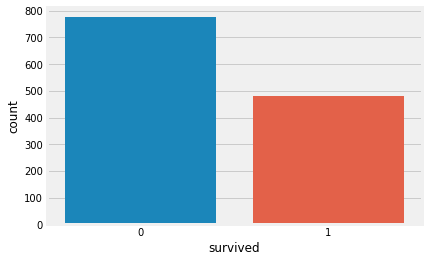

In [17]:
#Using the countplot- deduction: the number of survivors (where 1 being survived) were less than the people who died. 

sb.countplot('survived',data=data)
plt.show()

In [18]:
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           124
        1           328
male    0           652
        1           153
Name: survived, dtype: int64

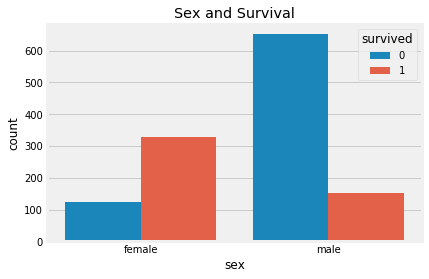

In [19]:
#checking if the sex of the passenger is impacting the survival

sb.countplot('sex',hue='survived',data=data)
plt.title('Sex and Survival')
plt.show()

The above countplot and the grouped data shows that out of 452 females, 328 survived, whereas this count is significantly different for the male counterpart.

Let's now check how survival is dependent upon the passenger class.

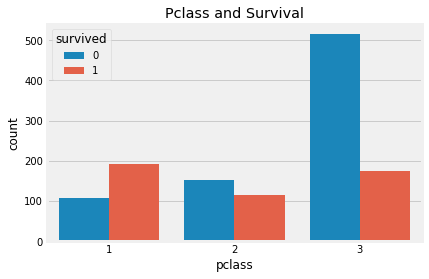

In [20]:
sb.countplot('pclass', hue='survived', data=data)
plt.title('Pclass and Survival')
plt.show()

Wow! This countplot is pretty self-explanatory as most number of people who died were from the 3rd Passenger Class- "money can definitely buy your lives, sometimes". Very clearly, passengers who were traveling first class were given higher priority while rescuing.

Now, let's see what happens if we see impact of both the pclass and the sex of the passenger.

In [21]:
pd.crosstab([data.sex,data.survived],data.pclass,margins=True).style.background_gradient()

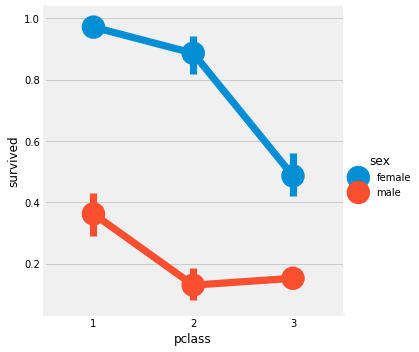

In [22]:
sb.factorplot('pclass', 'survived', hue='sex', data=data)
plt.show()

Not to our surprise, only 4 out of 137 females travelling first class died. On the other hand, males were given less priority over females irrespective of the class of the passenger.

The below factor plots represent the impact of the initials of the passenger and the class they were traveling in on the chances of their survival. For example, 1st class passengers with the title 'Miss.' had more chances of survival than a a passenger with the title 'Mr.' traveling in 3rd class

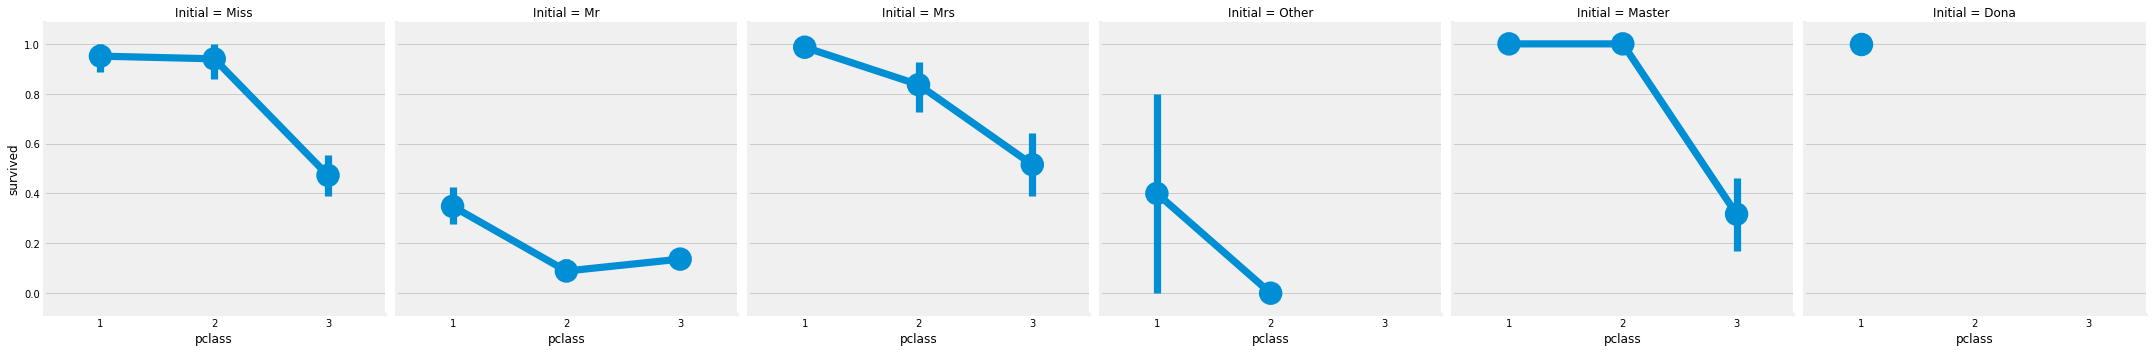

In [23]:
sb.factorplot('pclass','survived',col='Initial',data=data)
plt.show()

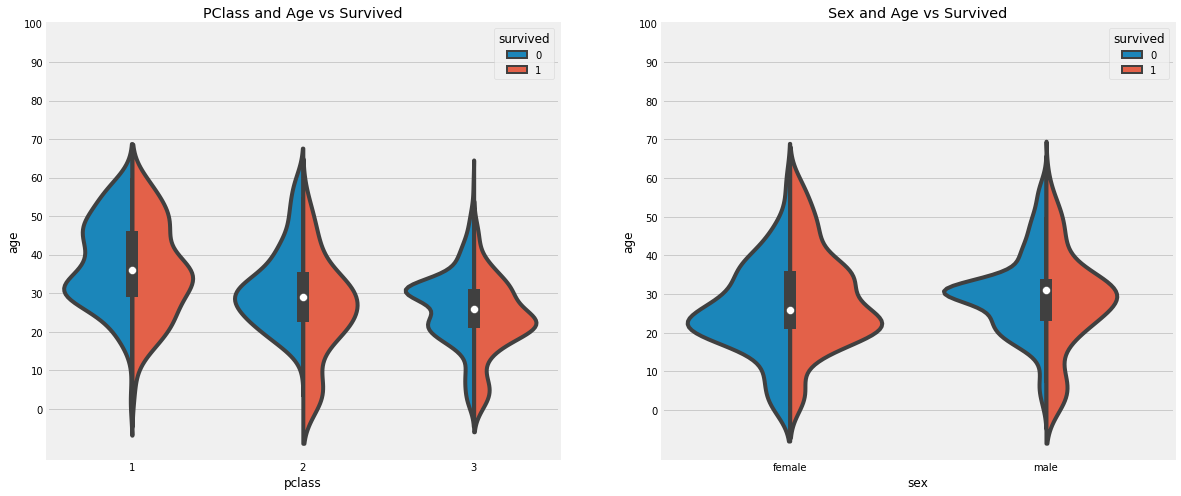

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('pclass','age',hue='survived',data=data,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("sex","age", hue="survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From the above violen plots, following observations are clear, 
1. The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 
2. Survival rate of children, for age 10 and below is good irrespective of Class 
3. Survival rate between age 20–30 is well and is quite better for women.



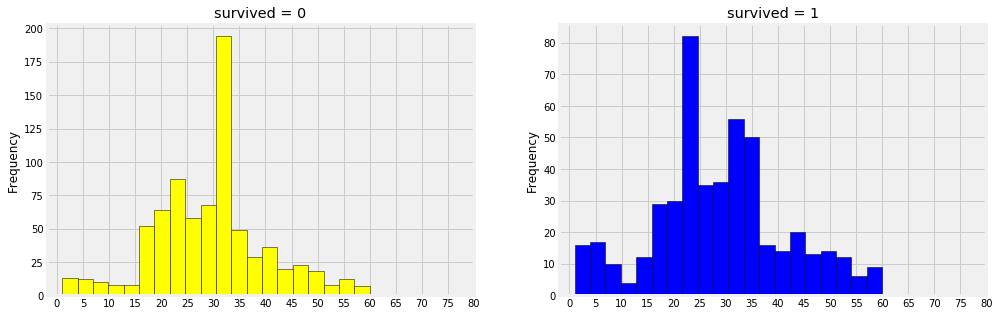

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='yellow')
ax[0].set_title('survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['survived']==1].age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('survived = 1')
plt.show()

###### From the above plots, I found the following observations:
1. First priority during the process of rescue was given to children and women, as the children less than the age of 5 are save by large numbers.
2. The oldest saved passenger is of 60
3. The most deaths were between 30–35


--Checking the impact of the 'sibsp' column, which means if the passenger had any siblings or their spouse who were travelling with them:

In [26]:
pd.crosstab([data.sibsp],data.survived).style.background_gradient('summer_r')

survived,0,1
sibsp,,
0,559,300
1,146,155
2,23,17
3,14,6
4,19,3
5,6,0
8,9,0


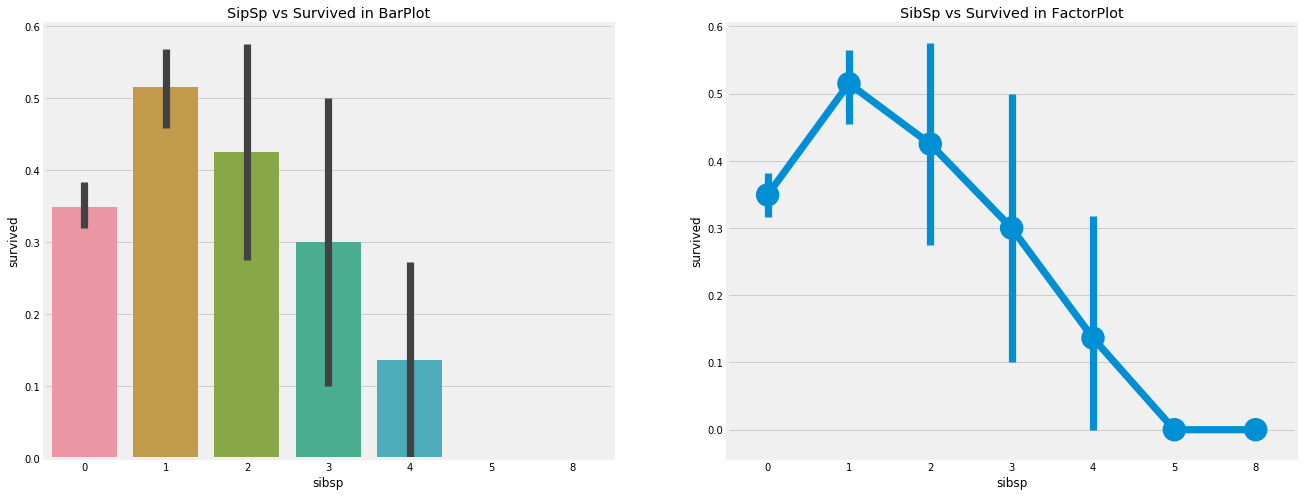

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot('sibsp','survived', data=data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sb.factorplot('sibsp','survived', data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

Barplot and FactorPlot show that if a passanger is alone in ship with no siblings or spouse, the survival rate is 34.92%. The graph decreases as no of siblings increase.

In [28]:
pd.crosstab(data.sibsp,data.pclass).style.background_gradient('summer_r')

pclass,1,2,3
sibsp,,,
0,185,176,498
1,103,78,120
2,8,12,20
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


The survival rate for families with 5–8 members is 0%. Is this because of PClass? Yes this is PClass, The crosstab shows that Person with SibSp>3 were all in Pclass3. It is easy to say that all the large families in Pclass3 died.

# Conclusion

By this exploratory data analysis, we can clearly conclude that the most priveleged set of passengers who were rescued first during this unfortunate incident of Titanic crash were the following:

- old and children below the age of 5
- first class passengers
- female passengers

To no surpise, this was exactly what was portrayed in the movie 'Titanic'.

# Part 2: Logistic Regression Model

I am now going to build a logistic regression model on the same data set after visualising all of its features. 

Initially, I will drop the columns that I do not need in this model- 'name' and 'embarked' and import the library called 'sklearn' used for most machine learning algorithms. For now, I am importing all the contents from this library for this regression model.

In [29]:
from sklearn import *

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
data=data.drop(['name','embarked'],1)

Creating dummies for rest of the data, including the columns 'sex' (0:female, 1: male) and 'Initial'.



In [32]:
data1=pd.get_dummies(data, drop_first=True)
data1

,pclass,survived,age,sibsp,parch,fare,sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,1,29.0,0,0,211.3375,0,0,1,0,0,0
1,1,0,2.0,1,2,151.5500,0,0,1,0,0,0
2,1,0,30.0,1,2,151.5500,1,0,0,1,0,0
3,1,0,25.0,1,2,151.5500,0,0,0,0,1,0
4,1,1,48.0,0,0,26.5500,1,0,0,1,0,0
5,1,0,39.0,0,0,0.0000,1,0,0,1,0,0
6,1,1,53.0,2,0,51.4792,0,0,0,0,1,0
7,1,0,47.0,1,0,227.5250,1,0,0,0,0,1
8,1,1,18.0,1,0,227.5250,0,0,0,0,1,0
9,1,1,24.0,0,0,69.3000,0,0,1,0,0,0


I will name this converted dataset as 'data1' and apply the train-test split function to it, test being 30% of the data.

In [33]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data1.drop('survived',1),data.survived, test_size=0.30, random_state=45)

Fitting logistic regression to the training set,

In [34]:
LGM=linear_model.LogisticRegression()
LGM.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_predict = LGM.predict(x_test)

In [36]:
LGM.predict_proba(x_test[:5])

array([[0.33762861, 0.66237139],
       [0.80742951, 0.19257049],
       [0.87453482, 0.12546518],
       [0.71010424, 0.28989576],
       [0.87452195, 0.12547805]])

By using the predict_proba function, we can very well validate our model. The above output shows that the second element of each list in the array represent the probability of how likely a passenger will be able to survive the crash.

In [37]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(LGM.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(LGM.score(x_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.7937
Accuracy of logistic regression classifier on train set: 0.8100


To plot a confusion matrix and classification report, we use the confusion_matrix function present in the sklearn library.

In [38]:
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[210  34]
 [ 44  90]]


Text(0.5, 18.5, 'Predicted label')

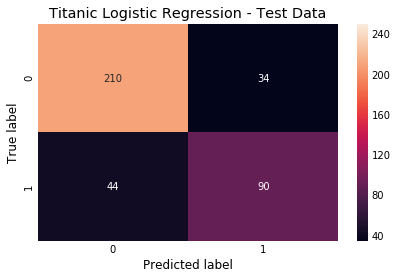

In [39]:
sb.heatmap(confusion_matrix,annot=True,vmax=250,fmt='g',)
plt.title('Titanic Logistic Regression - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

The confusion matrix above tells us that this logisitic regression model makes correct predictions for 300 (2019+91) passengers and incorrect predictions for 78 passengers.

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       244
           1       0.73      0.67      0.70       134

   micro avg       0.79      0.79      0.79       378
   macro avg       0.78      0.77      0.77       378
weighted avg       0.79      0.79      0.79       378



Interpretation:

- Precision is intuituvely the ability of the classifier to not predict a sample as survived if it has not. The model is 73% precise here.

- The recall is intuitively the ability of the classifier to find all the survived samples- here its ability is 67%.

- The F1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

- The support is the number of occurrences of each class in y_test.